


The Data I am going to work on ("https://data.ontario.ca/en/dataset/forest-resources-of-ontario-2021/resource/1504d687-e020-4d39-97f8-a980c773f519") provides comprehensive information about forest areas, categorized by various forest types and spanning multiple years. Key columns in the dataset include:

SnapYr: The year when the forest data was recorded (e.g., 2000, 2010, 2020)

Forest Type: The type of forest ecosystem (e.g., Conifer Lowland, Mixedwood, Jack Pine, etc.)

SumOfHa: The total area covered by each forest type in hectares.




What We Are Going to Do:

We transform the original dataset to create a more concise version by:

1.Filtering data to include only three key years (2000, 2010, and 2020) to focus on specific time points of interest.

2.Grouping the data by SnapYr and Forest Type to aggregate the total area (SumOfHa) for each forest type in these years.



In [26]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
# check data features
df = pd.read_csv("historical.csv")
print(df.columns)




Index(['PFT', 'SnapYr', 'Forest Type', 'AC_10', 'Age Class', 'SumOfHa'], dtype='object')


In [25]:
# check forest types
forest_types = df["Forest Type"].unique()
forest_types

array(['White Birch', 'Conifer Lowland', 'Conifer Upland', 'Mixedwood',
       'Jack Pine', 'Poplar', 'Red and White Pine', 'Tolerant Hardwoods'],
      dtype=object)

First we are going to filter data . The idea is to have a dataframe which containes the total area of each forest per 3 selected years : 2000 , 2010  and 2020

In [ ]:


# Load the data into a pandas DataFrame
df = pd.read_csv('historical.csv')

# Filter the DataFrame to include only specific years
filtered_df = df[df['SnapYr'].isin([2000, 2010, 2020])]

# Group by 'SnapYr' and 'Forest Type' and calculate the sum of 'SumOfHa'
grouped_df = filtered_df.groupby(['SnapYr', 'Forest Type'], as_index=False)['SumOfHa'].sum()

# Rename the aggregated column to 'TotalArea'
grouped_df.rename(columns={'SumOfHa': 'TotalArea'}, inplace=True)

# Save the result as another DataFrame
forest_revised_df = grouped_df
print(forest_revised_df)



    SnapYr         Forest Type   TotalArea
0     2000     Conifer Lowland  5699612.72
1     2000      Conifer Upland  6434713.81
2     2000           Jack Pine  2216974.69
3     2000           Mixedwood  5792145.98
4     2000              Poplar  1927108.83
5     2000  Red and White Pine   837291.50
6     2000  Tolerant Hardwoods  1135178.66
7     2000         White Birch  1568823.73
8     2010     Conifer Lowland  6141328.23
9     2010      Conifer Upland  6689679.26
10    2010           Jack Pine  2208763.46
11    2010           Mixedwood  5061836.12
12    2010              Poplar  2641554.93
13    2010  Red and White Pine   735599.26
14    2010  Tolerant Hardwoods  1215299.28
15    2010         White Birch  1712466.21
16    2020     Conifer Lowland  6089623.88
17    2020      Conifer Upland  7940676.46
18    2020           Jack Pine  2298517.21
19    2020           Mixedwood  5935338.27
20    2020              Poplar  2015494.30
21    2020  Red and White Pine   953854.12
22    2020 

Now we will create a plot with 3 subplots , each containing data for a specific year . We are going to create bar plots.

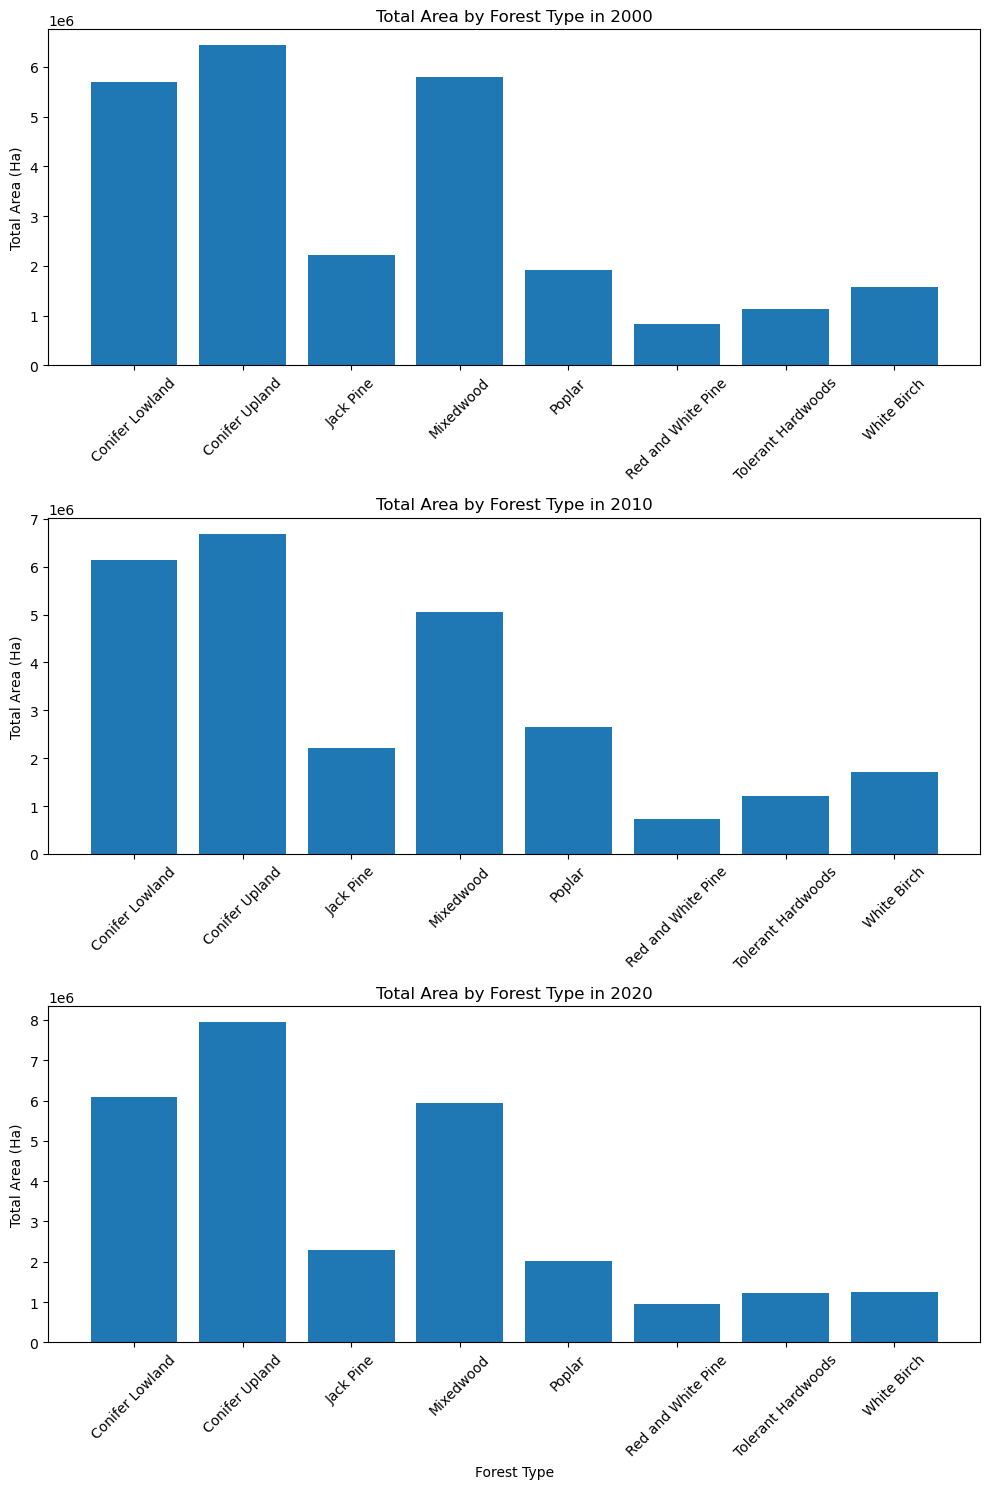

In [ ]:

fig, axes = plt.subplots(3, 1, figsize=(10, 15)) # 3 rows , 1 column

# Plot data for the year 2000
data_2000 = forest_revised_df[forest_revised_df['SnapYr'] == 2000]
axes[0].bar(data_2000['Forest Type'], data_2000['TotalArea'])
axes[0].set_title('Total Area by Forest Type in 2000')
axes[0].set_ylabel('Total Area (Ha)')
axes[0].tick_params(axis='x', rotation=45)

# Plot data for the year 2010
data_2010 = forest_revised_df[forest_revised_df['SnapYr'] == 2010]
axes[1].bar(data_2010['Forest Type'], data_2010['TotalArea'])
axes[1].set_title('Total Area by Forest Type in 2010')
axes[1].set_ylabel('Total Area (Ha)')
axes[1].tick_params(axis='x', rotation=45)

# Plot data for the year 2020
data_2020 = forest_revised_df[forest_revised_df['SnapYr'] == 2020]
axes[2].bar(data_2020['Forest Type'], data_2020['TotalArea'])
axes[2].set_title('Total Area by Forest Type in 2020')
axes[2].set_ylabel('Total Area (Ha)')
axes[2].tick_params(axis='x', rotation=45)

# Common X label
axes[-1].set_xlabel('Forest Type')

plt.tight_layout()
plt.show()


